# 【問題1】線形回帰のクラスを作成する
- 数式を意識すべきところは理解を深めるために愚直にかく  
 from IPython.core.debugger import Pdb; Pdb().set_trace()

In [1]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    
    
    def __init__(self, num_iter=50, lr=1e-7,  no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = np.array([])

        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

          Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # 次元数を必要に応じて追加
        if X.ndim < 2:
            X = X[:, np.newaxis]
        if y.ndim < 2:
            y = y[:, np.newaxis]
        
        # X_val,y_valが定義されている時
        if X_val is not None and y_val is not None:
            # 次元数を必要に応じて追加
            if X_val.ndim < 2:
                X_val = X_val[:, np.newaxis]
            if y_val.ndim < 2:
                y_val = y_val[:, np.newaxis]
            # バイアス入れないフラグが立っていない場合は、バイアス項を1で先頭列に挿入
            if self.no_bias is False:
                X_val = np.hstack((np.ones(len(X_val))[:, np.newaxis], X_val))
        
        # バイアス入れないフラグが立っていない場合は、バイアス項を1で先頭列に挿入
        if self.no_bias is False:
            X = np.hstack((np.ones(len(X))[:, np.newaxis], X))
        
        # パラメータを列数に応じて乱数で初期化
        self.coef_ =  np.random.rand(X.shape[1])[:, np.newaxis]
        
        for i in range(self.iter):
            # 仮定関数コール
            y_hat = self._linear_hypothesis(X)
            
            # 誤差を格納
            self.loss[i], error = mean_squared_error(y, y_hat)
            
            # 最急降下法関数コール
            self._gradient_descent(X, error)

            # X_val,y_valが定義されている時
            if X_val is not None and y_val is not None:
                # 仮定関数コール
                y_val_hat = self._linear_hypothesis(X_val)
                
                # 誤差を格納
                self.val_loss[i], error = mean_squared_error(y_val, y_val_hat)


    def _linear_hypothesis(self, X):
        """
        線形回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
        y_hat : 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        
        # 仮定関数の計算
        y_hat = np.dot(X, self.coef_)
        
        return y_hat
        
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、パラメータを更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        error : 次の形のndarray, shape (n_samples, n_features)
          予測値と実測値の差分データ

        """
       
        # 勾配を計算
        gradient = np.dot(X.T, error) / len(X)
        
        # パラメータ更新(theta - 学習率*勾配)
        self.coef_ -=  self.lr * gradient
        
        
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # バイアス入れないフラグが立っていない場合は、バイアス項のパラメータをのぞいて算出
        if self.no_bias is False:
            y_pred = np.dot(X, self.coef_[1:])
        else:
            y_pred = np.dot(X, self.coef_)
        
        return y_pred

* 目的関数

In [2]:
    def mean_squared_error(y_true, y_pred):
        """
        ロジスティック回帰回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
       
        error = y_pred - y_true
        mse = np.sum(error**2) / len(y_pred)
        
        return mse, error

In [3]:
import pandas as pd
df = pd.read_csv('../input/train.csv')

X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


reg = ScratchLinearRegression()
reg.fit(X_train, y_train, X_test, y_test)

* predictメソッド

In [4]:
y_pred = reg.predict(X_test)
print(y_pred)

[[203736.94522933]
 [167712.62923823]
 [180221.90914716]
 [306488.83077766]
 [136625.33397947]
 [206396.72641462]
 [276858.15125872]
 [175454.43270591]
 [192301.13940022]
 [242056.28844901]
 [143215.15755997]
 [185799.27678457]
 [208509.9766866 ]
 [149127.55881797]
 [134610.77728342]
 [158748.07257826]
 [166148.08736581]
 [158514.21003073]
 [137710.44070302]
 [207760.50360541]
 [206614.37874513]
 [199278.75962409]
 [136269.13514759]
 [178569.40630989]
 [268329.49928153]
 [197213.31738063]
 [170626.53814969]
 [197911.90491441]
 [126002.11944446]
 [160421.14060505]
 [187163.35398624]
 [155996.35287659]
 [161316.21525805]
 [239898.30766741]
 [153333.49417241]
 [168381.49643589]
 [297909.59326394]
 [130368.06652244]
 [126235.08195935]
 [242893.12247329]
 [162542.34598011]
 [113736.23465062]
 [264414.7670707 ]
 [158204.91919473]
 [159504.90074077]
 [178114.81391296]
 [234918.05647984]
 [168326.93334782]
 [207611.82451471]
 [163270.05382825]
 [158448.91433158]
 [144484.81874813]
 [183459.219

### 各関数でやっていること
- fit(self, X, y, X_val=None, y_val=None)　　

    以下の関数を指定した回数分ループし、パラメータ$\theta$を更新していく
<br><br>


- \_linear_hypothesis(X)
線形回帰の仮定関数  

    $h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)$

    $x$ : 特徴量ベクトル

    $\theta$ : パラメータベクトル

    $n$ : 特徴量の数

    $x_j$ : j番目の特徴量

    $\theta_j$ : j番目のパラメータ（重み）
    
    ベクトル形式で表すと以下  
    $h_\theta(x) = \theta^T \cdot x.$
<br><br>


 - MSE(y_pred, y)
 線形回帰の仮定関数
 
    $J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m}. (h_\theta(x^{(i)})-y^{(i)})^2.$
     
    $m$ : 入力されるデータの数

    $h_\theta()$ : 仮定関数

    $x^{(i)}$ : i番目のサンプルの特徴量ベクトル

    $y^{(i)}$ : i番目のサンプルの正解値
 <br><br>
 
 
 - \_gradient_descent(self, X, error)
 最急降下法
 
     $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$
     
     $a$ : 学習率

     $i$ : サンプルのインデックス

     $j$ : 特徴量のインデックス
     


- 学習率の更新  
https://qiita.com/keng000/items/c50794fb7f029062bd0d

- 用語解説  
https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/#rmse-mae-dif

- newaxis  
https://qiita.com/rtok/items/10f803a226892a760d75

# 【問題2】学習曲線のプロット

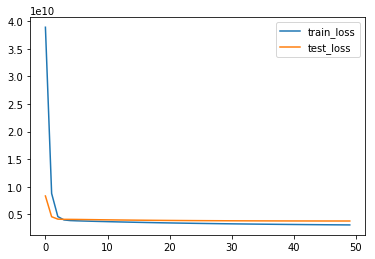

In [6]:
import seaborn as sns
def plot_learning_curve(train_loss, test_loss):
    sns.lineplot(data=train_loss, label='train_loss')
    sns.lineplot(data=test_loss, label='test_loss')
    
    
plot_learning_curve(reg.loss, reg.val_loss)

# 【問題7】スクラッチで学べることは何か
* ライブラリがどのようなアルゴリズムで実装されているかをいちから調査・実装することで、内部の仕組みを理解することができた。
* ライブラリの引数で指定しているパラメータがなにを指定しているのか、理解を深めることができた